In [1]:
import numpy as np
from scipy import constants 
import math

In [2]:
c=constants.c
e=constants.e

In [3]:
length=6000 #meters
dipole_length=14 #meters
fill_factor=0.67
number_dipols=length*0.67/dipole_length
number_dipols=math.ceil(number_dipols)
print('Total number of dipols:',number_dipols)

Total number of dipols: 288


<img src="./figures/LHC_cell.jpeg" width="600">

In [4]:
fodo_cell_length=100 #meter
number_fodo_cells=length/fodo_cell_length
quad_driftspace=fodo_cell_length/2.
print('Distance between two quadrupols:',quad_driftspace,'meter')

Distance between two quadrupols: 50.0 meter


In [5]:
dipols_per_driftspace=3
dipols_per_cell=2*dipols_per_driftspace # -> 6 dipols per cell

In [6]:
cells_with_dipols=number_dipols/dipols_per_cell
print('Number of cells containing dipols:',cells_with_dipols)

Number of cells containing dipols: 48.0


In [7]:
cells_straight_sections=number_fodo_cells-cells_with_dipols
print('Number of cells in straight sections:',cells_straight_sections)

Number of cells in straight sections: 12.0


In [8]:
fill_factor_in_fodo=6*dipole_length/(2*quad_driftspace)
print('Dipole fill factor in dipole FODO cells:',fill_factor_in_fodo*100,'%')

Dipole fill factor in dipole FODO cells: 84.0 %


## FODO transformation matrix for $x,x'$ or $y,y'$
- $\begin{pmatrix}u(z)\\u'(z)\end{pmatrix}=M_{\mathrm{FODO}}\cdot\begin{pmatrix}u(z_0)\\u'(z_0)\end{pmatrix}$
- $M_{\mathrm{FODO}}=\begin{pmatrix}1-2\frac{L^2}{f^2}&2L(1+\frac{L}{f})\\-\frac{1}{f^*}&1-2\frac{L^2}{f^2}\\\end{pmatrix}$

    with $\frac{1}{f^*}=2(1-\frac{L}{f})\frac{L}{f^2}$ and $f_F=-f_D=f$

- Stability: $|f|> \frac{L}{2}$ with $L$ the drift space between two quads 

- Optimal phase advance for round beam (e.g. protons):
$\Phi\overset{!}{=}90^\circ$
$\rightarrow f\overset{!}{=}\sqrt{2}L$

In [9]:
focal_length=quad_driftspace*np.sqrt(2)
print('Focal distance:',focal_length,'meter')

Focal distance: 70.71067811865476 meter


In [10]:
phase_advance=np.arccos(1-2*quad_driftspace**2/focal_length**2)
print('Phase advance:',phase_advance/(2*np.pi)*360,'degree')

Phase advance: 90.0 degree


### Quadrupole
- Gradient: $g=\frac{2\mu_0 n I}{R^2}$
- Strength: $k=\frac{e}{p}g=0.2998\frac{g[\mathrm{T/m}]}{p[\mathrm{Gev/c}]}$
- Focal length $f=\frac{1}{k\cdot l}$ with $l$ length of the quad

In [11]:
energy=3836/2. #GeV

In [12]:
quad_length= 1 # meter (LHC: 3.1 meter magnetic length)
quad_strength=1./(focal_length*quad_length)
print('Quadrupole strength k:',quad_strength,'m^-2')

Quadrupole strength k: 0.01414213562373095 m^-2


In [13]:
quad_gradient=quad_strength*energy/0.2998 
print('Quadrupole gradient g:',quad_gradient,'T/m (LHC: 220 T/m)')

Quadrupole gradient g: 90.47570422386912 T/m (LHC: 220 T/m)


In [14]:
quad_coil_current = 10000 # Ampere (LHC: 11470A)
quad_n_turns = 20

In [15]:
quad_aperture=np.sqrt(2*constants.mu_0*quad_n_turns*quad_coil_current/quad_gradient)
print('Quadrupole aperture R:',quad_aperture*1000,'mm (LHC: 56mm)')

Quadrupole aperture R: 74.536490719232 mm (LHC: 56mm)


In [16]:
mat_fodo=np.matrix([[0,2*quad_driftspace*(1+quad_driftspace/focal_length)],[-2*(1-quad_driftspace/focal_length)*quad_driftspace/(focal_length**2),0]])
mat_fodo

matrix([[ 0.00000000e+00,  1.70710678e+02],
        [-5.85786438e-03,  0.00000000e+00]])

$\beta=\beta^+$ in centre of the (horizontally) focusing quadrupole

$\beta=\beta^-$ in centre of the (horizontally) defocusing quadrupole


In [17]:
fodo_parameter=focal_length/quad_driftspace

In [18]:
beta_plus=quad_driftspace*fodo_parameter*(fodo_parameter+1)/np.sqrt(fodo_parameter**2-1)
beta_plus_opt=quad_driftspace*(2+np.sqrt(2))
print('beta plus (=optimal/minimal beta plus): ',beta_plus,'meter')

beta plus (=optimal/minimal beta plus):  170.71067811865473 meter


In [19]:
beta_minus=quad_driftspace*fodo_parameter*(fodo_parameter-1)/np.sqrt(fodo_parameter**2-1)
beta_minus_opt=quad_driftspace*(2-np.sqrt(2))
print('beta minus: ',beta_minus,'meter')

beta minus:  29.28932188134525 meter


<img src="./figures/beta_in_fodo.png" width="500">

Comparison with LHC:
- Phase advance $90^°$
- $\beta^+\approx 180\,$m
- $\beta^-\approx 30\,$m

In [40]:
emittance=2.5e-9 #meter rad
beam_envelope_max=np.sqrt(emittance*beta_plus_opt)
beam_envelope_min=np.sqrt(emittance*beta_minus_opt)
print('Maximum (or x-direction in middle of QF) beam envelope with emittance of 2.5 nm rad: +-',beam_envelope_max*1000,'mm')
print('Minimum (or y-direction in middle of QF) beam envelope with emittance of 2.5 nm rad: +-',beam_envelope_min*1000,'mm')

Maximum (or x-direction in middle of QF) beam envelope with emittance of 2.5 nm rad: +- 0.6532814824381883 mm
Minimum (or y-direction in middle of QF) beam envelope with emittance of 2.5 nm rad: +- 0.2705980500730985 mm


$\rightarrow$ more than enough space in quadrupole aperture ($74.5$ mm) to fit a beam screen of the needed 10 sigma of the beam size: $(10\cdot 0.65)$ mm

## Phase space ellipse parameters $\alpha, \beta, \gamma$
- Transfomation matrix for one lattice period: 
    $M=\begin{pmatrix}\cos\Phi+\alpha\sin\Phi & \beta\sin\Phi\\-\gamma\sin\Phi & \cos\Phi-\alpha\sin\Phi\\\end{pmatrix}$
    
    with stability criterion $Tr(M^N)=2\cos(N\Phi)\leq2 $,   
    and the trace and phase advance being invariant under changing the startig point.

- $\beta=\frac{M_{12}}{\sin\Phi}=M_{12}=2L(1+\frac{f}{L})$
- $\alpha=\frac{M_{11}-M_{22}}{2\sin\Phi}=\frac{M_{11}-M_{22}}{2\sin\Phi}=\frac{M_{11}-M_{22}}{2}$

### In the middle of the focussing defocussing quad:

- $ \beta_{F/D}=\frac{2L(1\pm\sin\frac{\Phi}{2})}{\sin\Phi}=2L(1 \pm \frac{1}{ \sqrt{2}})=L (2 \pm \sqrt{2})=\beta^\pm$
- $\alpha_{F/D}=0$

## Dispersion in the FODO cell with dipols
- Dispersion: change of position $\Delta x,y$ due to deviation from nominal momentum $\Delta p/p_0$: $\rightarrow D_{x,y}=\frac{\Delta u}{\Delta p/p_0}$
- in FODO cells: periodic dispersion function $D(z)\rightarrow \eta(z)$
- Chromatic transformation matrix through half a cell ($\frac{1}{2}QF - 3 \times B - \frac{1}{2} QD$) with thin lense and small bending angle $\theta$-approximation:
<img src="./figures/dispersion_fodo_1.png" width="500">
<img src="./figures/dispersion_fodo_2.png" width="500">

$\rightarrow$
The dispersion function in the middle of the focussing and defocussing quadrupole become the following respectively:
- $\eta^+=\frac{f^2}{\rho_0}(1+\frac{L}{2f})=\eta_{max}$
- $\eta^-=\frac{f^2}{\rho_0}(1+\frac{L}{2f})=\eta_{min}$

    with the bending radius $\rho_0$.

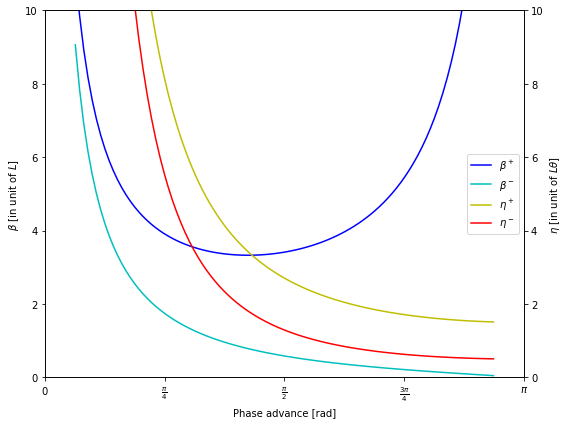

In [33]:
import matplotlib.pyplot as plt

epsilon=0.2
phi=np.linspace(epsilon,np.pi-epsilon,100)
beta_max=2*(1+np.sin(phi/2))/np.sin(phi)
eta_max=(np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
beta_min=2*(1-np.sin(phi/2))/np.sin(phi)
eta_min=(-np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
fig,ax=plt.subplots(figsize=(8,6))
ax_m=ax.twinx()
ax.set_xlabel("Phase advance [rad]")
ax.set_ylabel(r"$\beta$ [in unit of $L$]")
ax_m.set_ylabel(r"$\eta$ [in unit of $L\theta$]")
ax.set_ylim(0,10)
ax.set_xlim(0,np.pi)
ax_m.set_ylim(-0,10)
l1=ax.plot(phi,beta_max,c='b',label=r'$\beta^+$')
l2=ax.plot(phi,beta_min,c='c',label=r'$\beta^-$')
l3=ax_m.plot(phi,eta_max, c='y', label=r'$\eta^+$')
l4=ax_m.plot(phi,eta_min, c='r', label=r'$\eta^-$')
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='right')
ax.set_xticks(np.linspace(0,1,5,)*np.pi)
ax.set_xticklabels(["$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$",
                    r"$\frac{3\pi}{4}$", r"$\pi$",
                     ])

fig.tight_layout()



In [36]:
l=6
# arc length lm in meter
lm=l*1e3*0.67
# bending radius rho in meter
rho=lm/(2*np.pi)
print('Bending radius:',rho,'meter')

Bending radius: 639.8028712294193 meter


For the chosen phase advance $\Phi=\frac{\pi}{2}$, the dispersion functions maximum and minium become:

In [37]:
eta_max=quad_driftspace**2/(2*rho)*fodo_parameter*(2*fodo_parameter+1)
print('Maximum dispersion:',eta_max,'meter')

Maximum dispersion: 10.577894000321852 meter


In [41]:
eta_min=quad_driftspace**2/(2*rho)*fodo_parameter*(2*fodo_parameter-1)
print('Minimum dispersion:',eta_min,'meter')

Minimum dispersion: 5.051920196642293 meter


# Synchrotron radiation

## Energy loss per turn
- Synchrotron radiation power per turn:
    * $P_\mathrm{Proton}=\frac{P_e}{1836^4}$
    * $\langle P_e\rangle=\frac{c}{2\pi}C_\gamma E^4\langle\frac{1}{\rho^2}\rangle$ mit $C_\gamma=8.8463\cdot 10^{-5}\,\mathrm{\frac{m}{GeV^3}}$

- Energy loss per turn and proton:
    * $U_0=P_\gamma \frac{2\pi\rho}{\beta c}$
    * Isomagnetisches Lattice: $U_{0,\mathrm{iso}}(\mathrm{GeV})=\frac{1}{1836^4}C_\gamma\frac{E^4(\mathrm{GeV}^4)}{\rho(\mathrm{m})}$

- Average radiation power per beam of current $I=ef_{rev}N=1\,\mathrm{A}$:
    * $\langle P_s\rangle= U_0\frac{I}{e}$

In [62]:
C_gamma=8.8463e-5 #m/GeV^3
u_0iso=1e9/(1836**4)*C_gamma*energy**4/rho #eV
current=1 #Ampere
p_s=u_0iso*current #Watt
print('Energy loss per turn:',u_0iso,'eV')
print('Average radiation power of each beam of 1A:',p_s,'W')

Energy loss per turn: 164.6717809319344 eV
Average radiation power of each beam of 1A: 164.6717809319344 W
